<a href="https://colab.research.google.com/github/ChinarVyas/Internship/blob/main/upload/main/Practise_projects/Third-Phase-Practice-Projects/Glass_Identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report,accuracy_score,roc_curve,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score

In [3]:
gi = pd.read_csv('/content/drive/MyDrive/Data Analysis/Data/Glass Identification.csv',
                 names=['Id','refractive_index','sodium','magnesium','aluminum','silicon','potassium','calcium','barium','iron','glass_type'], index_col='Id')
gi

,refractive_index,sodium,magnesium,aluminum,silicon,potassium,calcium,barium,iron,glass_type
Id,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7


In [4]:
gi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 1 to 214
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   refractive_index  214 non-null    float64
 1   sodium            214 non-null    float64
 2   magnesium         214 non-null    float64
 3   aluminum          214 non-null    float64
 4   silicon           214 non-null    float64
 5   potassium         214 non-null    float64
 6   calcium           214 non-null    float64
 7   barium            214 non-null    float64
 8   iron              214 non-null    float64
 9   glass_type        214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 18.4 KB


In [5]:
gi.describe()

,refractive_index,sodium,magnesium,aluminum,silicon,potassium,calcium,barium,iron,glass_type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [6]:
gi.isnull().sum()

refractive_index    0
sodium              0
magnesium           0
aluminum            0
silicon             0
potassium           0
calcium             0
barium              0
iron                0
glass_type          0
dtype: int64

In [7]:
gi['glass_type'].unique()

array([1, 2, 3, 5, 6, 7])

2    76
1    70
7    29
3    17
5    13
6     9
Name: glass_type, dtype: int64


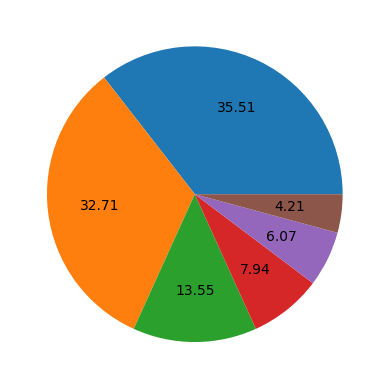

In [8]:
glass_tp=(gi['glass_type'].value_counts())
print(glass_tp)

plt.pie(x=glass_tp,autopct='%.2f',pctdistance=0.65)
plt.show()

There are 214 observations in the dataset. The dataset can be divided into window glass (classes 1-4) and non-window glass (classes 5-7)

In [9]:
Y=gi['glass_type'].apply(lambda y_value:1  if y_value>=4 else 0)
Y

Id
1      0
2      0
3      0
4      0
5      0
      ..
210    1
211    1
212    1
213    1
214    1
Name: glass_type, Length: 214, dtype: int64

In [12]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
X=gi.iloc[:,:-1]
gii=mm.fit_transform(X)
x=pd.DataFrame(gii)
print(len(x))

214


In [13]:
maxAcu = 0
maxRS = 0

for i in range(1,200):
    X_train,X_test,Y_train,Y_test =train_test_split(x,Y, test_size=0.30, random_state=i)
    RFR= RandomForestClassifier()
    RFR.fit(X_train, Y_train)
    pred = RFR.predict(X_test)
    acc= accuracy_score(Y_test, pred)
    if acc> maxAcu:
        maxAcu = acc
        maxRs = i
print("Best Accuracy : ", maxAcu, "with Random State", maxRS)

Best Accuracy :  1.0 with Random State 0


In [14]:
rfc=RandomForestClassifier()
rfc.fit(X_train, Y_train)
predrfc = rfc.predict(X_test)
print(accuracy_score(Y_test, predrfc))
print(confusion_matrix(Y_test, predrfc))
print(classification_report(Y_test, predrfc))

0.9230769230769231
[[45  3]
 [ 2 15]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        48
           1       0.83      0.88      0.86        17

    accuracy                           0.92        65
   macro avg       0.90      0.91      0.90        65
weighted avg       0.92      0.92      0.92        65



In [15]:
score = cross_val_score(rfc,x,Y)
print(score)
print(score.mean())
print("Difference btw accurancy and CV score is  ",accuracy_score(Y_test, predrfc) - score.mean())

[0.93023256 0.86046512 0.88372093 0.74418605 1.        ]
0.8837209302325583
Difference btw accurancy and CV score is   0.03935599284436486


In [16]:
lr= LogisticRegression()
lr.fit(X_train,Y_train)
predlr=lr.predict(X_test)
print(accuracy_score(Y_test, predlr))
print(confusion_matrix(Y_test, predlr))
print(classification_report(Y_test, predlr))

0.8923076923076924
[[47  1]
 [ 6 11]]
              precision    recall  f1-score   support

           0       0.89      0.98      0.93        48
           1       0.92      0.65      0.76        17

    accuracy                           0.89        65
   macro avg       0.90      0.81      0.84        65
weighted avg       0.89      0.89      0.89        65



In [17]:
score = cross_val_score(lr,x,Y)
print(score)
print(score.mean())
print("Difference btw accurancy and CV score is ",accuracy_score(Y_test, predlr) - score.mean())

[0.93023256 0.8372093  0.86046512 0.76744186 0.97619048]
0.8743078626799556
Difference btw accurancy and CV score is  0.01799982962773672


In [18]:
svm=SVC()
svm.fit(X_train,Y_train)
predsvm=svm.predict(X_test)
print(accuracy_score(Y_test, predsvm))
print(confusion_matrix(Y_test, predsvm))
print(classification_report(Y_test, predsvm))

0.9230769230769231
[[47  1]
 [ 4 13]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95        48
           1       0.93      0.76      0.84        17

    accuracy                           0.92        65
   macro avg       0.93      0.87      0.89        65
weighted avg       0.92      0.92      0.92        65



In [19]:
score = cross_val_score(svm,x,Y)
print(score)
print(score.mean())
print("Difference btw accurancy and CV score is  ",accuracy_score(Y_test, predsvm) - score.mean())

[0.90697674 0.86046512 0.93023256 0.74418605 1.        ]
0.8883720930232558
Difference btw accurancy and CV score is   0.03470483005366731


In [20]:
gb= GradientBoostingClassifier()
gb.fit(X_train,Y_train)
predgb=gb.predict(X_test)
print(accuracy_score(Y_test, predgb))
print(confusion_matrix(Y_test, predgb))
print(classification_report(Y_test, predgb))

0.9076923076923077
[[45  3]
 [ 3 14]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        48
           1       0.82      0.82      0.82        17

    accuracy                           0.91        65
   macro avg       0.88      0.88      0.88        65
weighted avg       0.91      0.91      0.91        65



In [21]:
score = cross_val_score(gb,x,Y)
print(score)
print(score.mean())
print("Difference btw accurancy and CV score is  ",accuracy_score(Y_test, predgb) - score.mean())

[0.97674419 0.88372093 0.8372093  0.8372093  1.        ]
0.9069767441860466
Difference btw accurancy and CV score is   0.0007155635062611188


In [22]:
ad=AdaBoostClassifier()
ad.fit(X_train,Y_train)
predad=svm.predict(X_test)
print(accuracy_score(Y_test, predad))
print(confusion_matrix(Y_test, predad))
print(classification_report(Y_test, predad))

0.9230769230769231
[[47  1]
 [ 4 13]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95        48
           1       0.93      0.76      0.84        17

    accuracy                           0.92        65
   macro avg       0.93      0.87      0.89        65
weighted avg       0.92      0.92      0.92        65



In [23]:
score = cross_val_score(ad,x,Y)
print(score)
print(score.mean())
print("Difference btw accurancy and CV score is  ",accuracy_score(Y_test, predad) - score.mean())

[0.95348837 0.93023256 0.8372093  0.8372093  1.        ]
0.9116279069767442
Difference btw accurancy and CV score is   0.0114490161001789


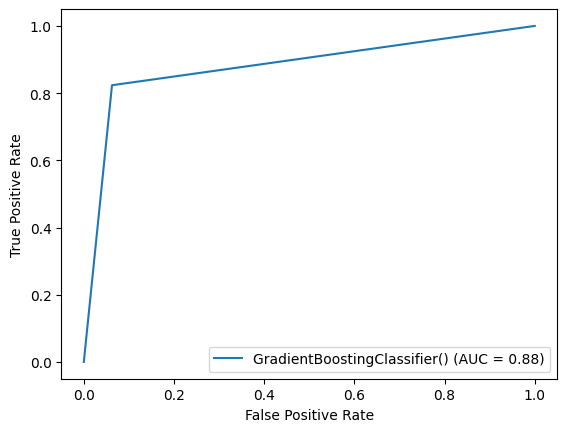

In [24]:
from sklearn import metrics
met=metrics
fpr,tpr,thresholds = met.roc_curve(Y_test, predgb)
roc_auc =met.auc(fpr,tpr)
display = met.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc, estimator_name= gb)
display.plot()

In [25]:
import joblib
joblib.dump(gb,'glass_identify.pkl')

['glass_identify.pkl']

In [27]:
model =joblib.load('glass_identify.pkl')
pred=model.predict(X_test)
pred

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0])

In [28]:
input_data=(1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.02,0.14)
in_dt=np.array(input_data)
fin_in_dt= in_dt.reshape(1,-1)


In [31]:
pred= model.predict(fin_in_dt)
pred

array([0])

In [30]:
if pred == 1:
    print('Non window glass ')
else:
    print("Window glass")

Window glass
